# TP2 - Market Basket Analysis 
INF8111 - Fouille de données, Automne 2022
### Membres de l'équipe / Team Components
    - Andi Podgorica (1955913)
    - Benjamin Boucher-Charest (1950849)


## Date et directives de remise / Delivery date and instructions
Vous remettrez ce fichier nommé TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb dans la boîte de remise sur moodle. 

**Date limite: Novembre 6 at 23:55**.
___
You should upload the file named TP2\_nameOfMember1\_nameOfMember2\_nameOfMember3.ipynb on moodle.

Everything must be uploaded before **November 6th at 23:55**.

## 1. Introduction: Market Basket Analysis

Le *Market Basket Analysis* (MBA) est une technique d'analyse de la fouille de données qui permet de découvrir les associations entre les produits ou leur regroupement. En explorant des motifs intéressants à partir d'une vaste collection de données, le MBA vise à comprendre / révéler les comportements d'achat des clients en se basant sur la théorie selon laquelle si vous avez acheté un certain ensemble de produits, vous êtes plus (ou moins) susceptible d'acheter un autre groupe de produits. En d'autres termes, le MBA permet aux détaillants d'identifier la relation entre les articles que les clients achètent, révélant des tendances d'articles souvent achetés ensemble.

Une approche largement utilisée pour explorer ces motifs consiste à construire *** des règles d'association *** telles que
- **si** acheté *ITEM_1* **alors** achètera *ITEM_2* avec **confiance** *X*.

Ces associations n'ont pas à être des règles individuelles. Ils peuvent impliquer de nombreux éléments. Par exemple, une personne dans un supermarché peut ajouter des œufs dans son panier, puis le MBA peut suggérer qu'elle achètera également du pain et/ou de la farine:

+ **si**  acheté *OEUFS* **alors** achètera [*PAIN* avec confiance *0,2*; *FARINE* avec confiance 0,05].

Cependant, si la personne décide maintenant d'ajouter de la farine à son panier, la nouvelle règle d'association pourrait être comme ci-dessous, suggérant des ingrédients pour faire un gâteau.

+ **si** acheté [*OEUFS, FARINE*] **alors** achètera [*SUCRE* avec confiance 0,45; LEVURE avec confiance 0,12; *PAIN* avec confiance *0,03*].

Il existe de nombreux scénarios réels où le MBA joue un rôle central dans l'analyse des données, comme les transactions de supermarché, les commandes en ligne ou l'historique des cartes de crédit. Les spécialistes du marketing peuvent utiliser ces règles d'association pour organiser les produits corrélés plus près les uns des autres sur les étagères des magasins ou faire des suggestions en ligne afin que les clients achètent plus d'articles. Un MBA peut généralement aider les détaillants à répondre aux questions les suivantes:

- Quels articles sont souvent achetés ensemble ?
- Étant donné un panier, quels articles suggérer ?
- Comment placer les articles ensemble sur les étagères ?
___
Market Basket Analysis (MBA) is a data mining analytics technique to uncover associations between products or product grouping. By exploring interesting patterns from an extensive collection of data, MBA aims to understand/reveal customer purchase behaviors based upon the theory that if you purchased a certain set of products, then you are more (or less) likely to buy another group of products. In other words, MBA allows retailers to identify the relationship between the items that customers buy, revealing patterns of items often purchased together.

A widely used approach to explore these patterns is by constructing ***association rules*** such as
- **if** bought *ITEM_1* **then** will buy *ITEM_2* with **confidence** *X*.

These associations do not have to be 1-to-1 rules. They can involve many items. For example, a person in a supermarket may add eggs to his/her cart, then an MBA application may suggest that the person will also buy some bread and/or flour: 

+ **if** bought *EGGS* **then** will buy [*BREAD* with confidence *0.2*; *FLOUR* with confidence 0.05].

However, if the person now decides to add flour to his/her cart, the new association rule could be as showing below, suggesting ingredients to make a cake.

+ **if** bought [*EGGS, FLOUR*] **then** will buy [*SUGGAR* with confidence 0.45; BAKING POWDER with confidence 0.12; *BREAD* with confidence *0.03*].

There are many real scenarios where MBA plays a central role in data analysis, such as supermarket transactions, online orders or credit card history. Marketers may use these association rules to arrange correlated products closer to each other on store shelves or make online suggestions so that customers buy more items. Some questions that an MBA can usually help retailers to answer are:

- What items are often purchased together?
- Given a basket, what items should be suggested?
- How should items be placed together on the shelves?

### Objectif

Votre objectif dans ce TP est de développer un algorithme MBA pour révéler les motifs en créant des règles d'association dans un ensemble de données volumineux avec plus de trois millions de transactions de supermarché. Cependant, la collecte de règles d'association dans les grands ensembles de données est un problème très intensif en calcul, ce qui rend presque impossible leur exécution sans système distribué. Par conséquent, pour exécuter votre algorithme, vous aurez accès à un cluster de *cloud computing* distribué avec des centaines de cœurs.

À cette fin, un algorithme **MapReduce** sera implémenté avec le framework [Apache Spark](http://spark.apache.org), un système informatique distribué rapide. En résumé, Spark est un framework open source conçu avec une méthodologie *scale-out* qui en fait un outil très puissant pour les programmeurs ou les développeurs d'applications pour effectuer un volume massif de calculs et de traitement de données dans des environnements distribués. Spark fournit des API de haut niveau qui facilitent la création d'applications parallèles sans avoir à se soucier de la façon dont votre code et vos données sont parallélisés / distribués par le cluster informatique. Spark fait tout pour vous.

La mise en œuvre suivra l'algorithme d'analyse du panier de marché présenté par Jongwook Woo et Yuhang Xu (2012). L'image **workflow.pdf** illustre le flux de travail de l'algorithme et doit être utilisée pour consultation tout au long de ce TP. Les cases bleues sont celles où vous devez implémenter une méthode pour effectuer une fonction de mappage ou de réduction, et les cases grises représentent leur sortie attendue. **Toutes ces opérations sont expliquées en détail dans les sections suivantes.**
___
Your goal in this TP is to develop an MBA algorithm for revealing patterns by creating association rules in a big dataset with more than three million supermarket transactions. However, mining association rules for large datasets is a very computationally intensive problem, which makes it almost impractical to perform it without a distributed system. Hence, to run your algorithm, you will have access to a distributed cloud computing cluster with hundreds of cores. 

To this end, a **MapReduce** algorithm will be implemented upon the [Apache Spark](http://spark.apache.org) framework, a fast cluster computing system. In a nutshell, Spark is an open source framework designed with a *scale-out* methodology which makes it a very powerful tool for programmers or application developers to perform a massive volume of computations and data processing in distributed environments. Spark provides high-level APIs that make it easy to build parallel apps without needing to worry about how your code and data are parallelized/distributed thought the computing cluster. Spark does it all for you.

The implementation will follow the Market Basket Analysis algorithm presented by Jongwook Woo and Yuhang Xu (2012). The image **workflow.svg** Illustrates the algorithm's workflow, and is to be used for consultation throughout this TP. The blue boxes are the ones where you must implement a method to perform a map or reduce function, and the gray boxes represent their expected output. **All these operations are explained in detail in the following sections.**

## 1. Configuration de Spark

Spark fonctionne sur les systèmes Windows et UNIX (par exemple, Linux, Mac OS). Il est facile d'exécuter Spark localement sur une seule machine - tout ce dont vous avez besoin est d'avoir Java installé sur votre système PATH, ou la variable d'environnement JAVA_HOME pointant vers une installation Java. Il est obligatoire que le **JDK v8** soit installé sur votre système, car Spark ne prend actuellement en charge que cette version. Si ce n'est pas le cas, accédez à [la page Web de Java](https://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html) pour télécharger et installer une machine virtuelle Java. N'oubliez pas de définir la variable d'environnement JAVA_HOME pour utiliser JDK v8 si votre installation ne le fait pas automatiquement. Mise à jour 2022: Il est à noté que pour les systèmes d'exploitation de **Google Cloud, JDK v8 n'est pas disponible. Remplacer cela par la JDK 10 (default-jdk) permet également à Spark de fonctionner pour ce TP.**

L'interface entre Python et Spark se fait via **PySpark**, qui peut être installé en exécutant `pip install pyspark` ou configuré en suivant la séquence ci-dessous:

1. D'abord, allez sur http://spark.apache.org/downloads
2. Sélectionnez la dernière version de Spark et le package pré-construit pour Apache Hadoop 2.7
3. Cliquez pour télécharger **spark-2.4.5-bin-hadoop2.7.tgz** et décompressez-le dans le dossier de votre choix.
4. Ensuite, exportez les variables suivantes pour lier PYSPARK (l'interface python de Spark) à votre distribution python dans votre fichier `~/.bash_profile`.

``
export SPARK_HOME=/chemin/ vers / spark-2.4.5-bin-hadoop2.7
export PYTHONPATH="$SPARK_HOME/python:$SPARK_HOME/python/lib/py4j-0.10.7-src.zip:$SPARK_HOME/python/lib/pyspark.zip:$ PYTHONPATH"
export PYSPARK_PYTHON=/chemin/vers/votre/python3
``

5. Exécutez `source ~./bash_profile` pour effectuer les modifications et redémarrer cette session de notebook jupyter.
___
Spark runs on both Windows and UNIX-like systems (e.g., Linux, Mac OS). It's easy to run locally on one machine — all you need is to have Java installed on your system PATH, or the JAVA_HOME environment variable pointing to a Java installation. It is mandatory that you have the **JDK v8** installed in your system, as Spark currently only support this version. If you haven't, go to [Java's web page](https://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html) to download and install a Java Virtual Machine. Remember to set the environment variable JAVA_HOME to use JDK v8 if your installation does not do it automatically for you. **2022 update: on google cloud the operating systems does not support JDK v8. It can be replaced by the JDK v10 (default-jdk) to be able to run the TP.**

The interface between Python and Spark is done through **PySpark**, which can be installed by running `pip install pyspark` or set up following the sequence below:

1. First, go to http://spark.apache.org/downloads 
2. Select the newest Spark release and the Pre-built for Apache Hadoop 2.7 package 
3. Click for download **spark-2.4.5-bin-hadoop2.7.tgz** and unzip it in any folder of your preference. 
4. Next, export the following variables to link PYSPARK (Spark's python interface) to your python distribution in your `~/.bash_profile` file.

``
export SPARK_HOME=/path/to/spark-2.4.5-bin-hadoop2.7
export PYTHONPATH="$SPARK_HOME/python:$SPARK_HOME/python/lib/py4j-0.10.7-src.zip:$SPARK_HOME/python/lib/pyspark.zip:$PYTHONPATH"
export PYSPARK_PYTHON=/path/to/your/python3
``

5. Run `source ~./bash_profile` to effectuate the changes and restart this jupyter notebook session.

#### Alternative for using Google Collab

Si vous pensez utiliser Google Colaboratory, exécutez la cellule de code suivante pour installer Spark
___
If you are planning on using Google Colaboratory platform, run the following code cell to set up Spark.

In [1]:
import os
!apt install -y default-jdk
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
!pip install pyspark==3.2
!pip list

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jdk is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse 

#### Testez votre Spark / Test your Spark
À l'aide du code suivant, vous pouvez tester si Spark est installé correctement.
___
Using the following code, you can test if Spark is installed correctly:

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



### 1.1 Exemple de comptage de produits / Products Counting Example 

Pour tester votre installation et commencer à vous familiariser avec Spark, nous suivrons un exemple qui compte combien de fois les produits d'un toy dataset ont été achetés.

Le principal point d'entrée pour commencer la programmation avec Spark est [l'API RDD](https://spark.apache.org/docs/latest/rdd-programming-guide.html), une excellente abstraction Spark pour travailler avec MapReduce. RDD est une collection d'éléments partitionnés sur les nœuds du cluster qui peuvent fonctionner en parallèle. En d'autres termes, RDD est la façon dont Spark maintient vos données prêtes à exécuter une fonction (par exemple, une fonction Map ou une fonction reduce) en parallèle. **Ne vous inquiétez pas si cela semble toujours déroutant, il sera clair une fois que vous commencerez à l'implémenter**. Cependant, cela fait partie de ce TP d'étudier / consulter [Spark python API](https://spark.apache.org/docs/latest/api/python/) et d'apprendre à l'utiliser. Certaines fonctions utiles offertes par l'API RDD sont:
___
To test your installation and start to get familiarized with Spark, we will follow an example that counts how many times the products of a toy dataset were purchased.

The main entry point to start programming with Spark is the [RDD API](https://spark.apache.org/docs/latest/rdd-programming-guide.html), an excellent Spark abstraction to work with the MapReduce framework.  RDD is a collection of elements partitioned across the nodes of the cluster that can operate in parallel. In other words, RDD is how Spark keeps your data ready to perform some function (e.g., a map or reduce function) in parallel. **Do not worry if this still sounds confusing, it will be clear once you start implementing**. However, it is part of this TP to study/consult the [Spark python API](https://spark.apache.org/docs/latest/api/python/) and learn how to use it. Some useful functions that the RDD API offers are:

1. **map**: return a new RDD by applying a function to each element of this RDD.
2. **flatMap**: return a new RDD by first applying a function to all elements of this RDD, and then flattening the results. **Should be used when each entry will yield more than one mapped element**
3. **reduce**: reduces the elements of this RDD using the specified commutative and associative binary operator.
4. **reduceByKey**: merge the values for each key using an associative and commutative reduce function
5. **groupByKey**: group the values for each key in the RDD into a single sequence
6. **collect**: return a list that contains all of the elements in this RDD. **Should not be used when working with a lot of data**
7. **takeSample**: return a sampled subset of this RDD
8. **count**: return the number of elements in this RDD.
9. **filter**: return a new RDD containing only the elements that satisfy a predicate.

In [3]:
from pyspark.sql import SparkSession

def map_to_product(row):
    """
    Map each transaction into a set of KEY-VALUE elements.
    The KEY is the word (product) itself and the VALUE is its number of apparitions.
    """
    products = row.transaction.split(';') # split products from the column transaction
    for p in products:
        yield (p, 1)

def reduce_product_by_key(value1, value2):
    "Reduce the mapped objects to unique words by merging (summing ) their values"
    return value1+value2

# Initializates a object of SparkSession class, main entry point to Spark's funcionalites
spark = SparkSession.builder.getOrCreate()
        
# Read a toy dataset
toy = spark.read.csv('toy.csv', header=True)
print("Toy dataset")
toy.show()

# Obtain a RDD object to call a map function
toy_rdd = toy.rdd
print("Toy dataframe as a RDD object (list of Row objects):\n\t", toy_rdd.collect())

# Map function to identify all products
toy_rdd = toy_rdd.flatMap(map_to_product)
print("\nMapped products:\n\t", toy_rdd.collect())

# Reduce function to merge values of elements that share the same KEY
toy_rdd = toy_rdd.reduceByKey(reduce_product_by_key)
print("\nReduced (merged) products:\n\t", toy_rdd.collect())

print("\nVisualizing as a dataframe:")
toy_rdd.toDF(["product", "count_product"]).show()

Toy dataset
+--------+-----------+
|order_id|transaction|
+--------+-----------+
|       1|    a;b;c;f|
|       2|    d;b;a;e|
|       3|        c;b|
|       4|        b;c|
+--------+-----------+

Toy dataframe as a RDD object (list of Row objects):
	 [Row(order_id='1', transaction='a;b;c;f'), Row(order_id='2', transaction='d;b;a;e'), Row(order_id='3', transaction='c;b'), Row(order_id='4', transaction='b;c')]

Mapped products:
	 [('a', 1), ('b', 1), ('c', 1), ('f', 1), ('d', 1), ('b', 1), ('a', 1), ('e', 1), ('c', 1), ('b', 1), ('b', 1), ('c', 1)]

Reduced (merged) products:
	 [('a', 2), ('b', 4), ('c', 3), ('f', 1), ('d', 1), ('e', 1)]

Visualizing as a dataframe:
+-------+-------------+
|product|count_product|
+-------+-------------+
|      a|            2|
|      b|            4|
|      c|            3|
|      f|            1|
|      d|            1|
|      e|            1|
+-------+-------------+



### 1.2 Travailler avec Spark Dataframe / Working with Spark Dataframes

Dans l'exemple ci-dessus, nous avons brièvement utilisé une classe Dataframe de Spark, mais uniquement pour obtenir un objet RDD avec ``toy.rdd`` et pour aficher les données sous forme de tableau structuré avec le ``show ()`` une fonction. Cependant, [Dataframe](http://spark.apache.org/docs/latest/api/python/) est une partie cruciale de la version actuelle de Spark et est construit sur l'API RDD. Il s'agit d'une collection distribuée de lignes sous des colonnes nommées, identique à une table dans une base de données relationnelle. Le Dataframe de Spark fonctionne de la même manière que [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). En fait, nous pouvons exporter (obtenir) une Dataframe Spark vers (à partir de) ​​une Dataframe pandas avec la fonction ``toPandas()``  (``spark.createDataFrame``).

Une fonctionnalité centrale du Dataframe est de bénéficier du [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html#sql), un module qui permet des requêtes SQL sur des données structurées. Par exemple, le même « exemple de comptage de produits » aurait pu être implémenté comme une séquence d'opérations SQL sur les données:
___

In the example above, we briefly used a Spark's Dataframe class, but only to obtain an RDD object with ```toy.rdd``` and to print the data as a structured table with the ```show()``` function. However, [Dataframe](http://spark.apache.org/docs/latest/api/python/) is a crucial part of the current Spark release and is built upon the RDD API. It is a distributed collection of rows under named columns, the same as a table in a relational database. Spark's Dataframe works similarly as [Pandas'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). In fact, we can export (obtain) a Spark's dataframe to (from) a pandas' data frame with the function ```toPandas()``` (```spark.createDataFrame```).

A central functionality of the data frame is to profit from the [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html#sql), a module that allows SQL queries over structured data. For example, the same 'product counting example' could have been implemented as a sequence of SQL operations over the data:  

In [4]:
import pyspark.sql.functions as f

# Creates a new column, products, with all products appering in each transaction
print('New column \'products\': exploding the transaction\'s products to a new row')
df_toy = toy.withColumn('products', f.explode(f.split(toy.transaction, ';')))
df_toy.show()

# Performs a select query and group rows by the product name, aggreagating by counting
print('Couting unique products:')
df_toy.select(df_toy.products)\
      .groupBy(df_toy.products)\
      .agg(f.count('products').alias('count_product'))\
      .sort('count_product', ascending=False)\
      .show()

New column 'products': exploding the transaction's products to a new row
+--------+-----------+--------+
|order_id|transaction|products|
+--------+-----------+--------+
|       1|    a;b;c;f|       a|
|       1|    a;b;c;f|       b|
|       1|    a;b;c;f|       c|
|       1|    a;b;c;f|       f|
|       2|    d;b;a;e|       d|
|       2|    d;b;a;e|       b|
|       2|    d;b;a;e|       a|
|       2|    d;b;a;e|       e|
|       3|        c;b|       c|
|       3|        c;b|       b|
|       4|        b;c|       b|
|       4|        b;c|       c|
+--------+-----------+--------+

Couting unique products:
+--------+-------------+
|products|count_product|
+--------+-------------+
|       b|            4|
|       c|            3|
|       a|            2|
|       f|            1|
|       e|            1|
|       d|            1|
+--------+-------------+



En outre, les mêmes opérations SQL effectuées ci-dessus auraient pu être effectuées avec une requête en langage SQL traditionnel comme indiqué ci-dessous:
___
Also, the same SQL operations performed above could have been done with a traditional SQL language query as showing below:

In [5]:
# Creates a relational table TOY in the Spark session
df_toy.createOrReplaceTempView("TOY")

spark.sql("SELECT t.products, COUNT(t.products) AS product_count"
          " FROM TOY t"
          " GROUP BY t.products"
          " ORDER BY product_count DESC").show()

+--------+-------------+
|products|product_count|
+--------+-------------+
|       b|            4|
|       c|            3|
|       a|            2|
|       f|            1|
|       e|            1|
|       d|            1|
+--------+-------------+



Ces concepts SQL sont mentionnés ici car ils nous seront utiles lors du TP, principalement dans la section 3, pour manipuler les données du supermarché, qui sont structurées en tableaux. Ainsi, si vous n'êtes pas familier avec SQL, il est recommandé de suivre un [tutoriel](https://www.w3schools.com/sql/) pour comprendre les bases.
___
These SQL concepts are being mentioned here because they will be useful to us during the TP, mainly in Section 3, to manipulate the supermarket data, which is structured in tables. Thus, if you are not familiar with SQL, it is recommended that you follow a [tutorial](https://www.w3schools.com/sql/) to understand the basics.



## 2. Algorithme MBA (45 points)
Les sections suivantes expliquent comment développer chaque étape de l'algorithme MapReduce pour notre application de supermarché. La figure workflow.pdf illustre chaque étape de l'algorithme.
___
The following sections explain how you should develop each step of the MapReduce algorithm for our supermarket application. Figure workflow.png illustrates each step of the algorithm.



### 2.1 Map to Patterns / Map to Patterns (10 points)
Pour un sous-ensemble de transactions (c'est-à-dire les lignes de notre toy dataset), chaque transaction doit être **mappée** vers un ensemble de *motifs d'achat* trouvés dans la transaction. Formellement, ces motifs sont des sous-ensembles de produits qui représentent un groupe d'articles achetés ensemble. 

Pour le framework MapReduce, chaque motif doit être créé comme un élément *KEY-VALUE*, où la KEY peut prendre la forme d'un singleton, d'une paire ou d'un trio de produits présents dans la transaction. Plus précisément, pour chaque transaction, la fonction de mappage doit générer tous les sous-ensembles **UNIQUE** possibles de taille **UN, DEUX ou TROIS**. La VALEUR associée à chaque KEY est le nombre de fois que la KEY est apparue dans la transaction (si nous supposons qu'aucun produit n'apparaît plus d'une fois dans la transaction, cette valeur est toujours égale à un).

Maintenant, implémentez la fonction **map_to_patterns** qui reçoit une transaction (une ligne du dataset) et retourne les motifs trouvés dans la transaction. Les éléments mappés sont un tuple (KEY, VALUE), où KEY est également un tuple de noms de produits. Il est crucial de noter que, puisque chaque entrée (transaction) de la fonction MAP produira **plus** un élément KEY-VALUE, un *flatMap* doit être invoqué pour cette étape.

Pour le toy dataset, la sortie attendue est similaire à:
___
For a given set of transactions (i.e., the rows of our toy dataset), each transaction must be **mapped** into a set of *purchase patterns* found within the transaction. Formally, these patterns are subsets of products that represent a group of items bought together. 

For the MapReduce framework, each pattern must be created as a *KEY-VALUE* element, where the KEY can take the form of a singleton, a pair or a trio of products that are present in the transaction. More precisely, for each transaction, the mapping function must generate all possible **UNIQUE** subsets of size **ONE, TWO or THREE**.  The VALUE associated with each KEY is the number of times that the KEY appeared in the transaction (if we assume that no product appears more than once in the transaction, this value is always equal to one). 

Now, implement the **map_to_patterns** function that receives a transaction (a row from the data frame) and returns the patterns found in the transaction. The mapped elements are a tuple (KEY, VALUE), where KEY is also a tuple of product names. It is crucial to notice that, since each entry (transaction) of the map function will **yield** more than one KEY-VALUE element, a *flatMap* must be invoked for this step.

For the toy dataset, the expected output is similar to:



<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 20em; padding-left:1px">
<code>
+---------------+-----------+
|       patterns|occurrences|
+---------------+-----------+
|         ('a',)|          1|
|     ('a', 'b')|          1|
|('a', 'b', 'c')|          1|
|('a', 'b', 'f')|          1|
|     ('a', 'c')|          1|
|('a', 'c', 'f')|          1|
|     ('a', 'f')|          1|
|         ('b',)|          1|
|     ('b', 'c')|          1|
|('b', 'c', 'f')|          1|
|     ('b', 'f')|          1|
|         ('c',)|          1|
|     ('c', 'f')|          1|
|         ('f',)|          1|
|         ('a',)|          1|
|     ('a', 'b')|          1|
|('a', 'b', 'd')|          1|
|('a', 'b', 'e')|          1|
|     ('a', 'd')|          1|
|('a', 'd', 'e')|          1|
|     ('a', 'e')|          1|
|         ('b',)|          1|
|     ('b', 'd')|          1|
|('b', 'd', 'e')|          1|
|     ('b', 'e')|          1|
|         ('d',)|          1|
|     ('d', 'e')|          1|
|         ('e',)|          1|
|         ('b',)|          1|
|     ('b', 'c')|          1|
|         ('c',)|          1|
|         ('b',)|          1|
|     ('b', 'c')|          1|
|         ('c',)|          1|
+---------------+-----------+
</code>
</pre>

In [6]:
# Source:  https://www.geeksforgeeks.org/itertools-combinations-module-python-print-possible-combinations/
from itertools import combinations # Generates all the combinations for the array elements.

def format_tuples(pattern):
    """
    Used for visualizition.
    Transforms tuples to a string since Dataframe does not support column of tuples with different sizes
    (a,b,c) -> '(a,b,c)'
    """
    return (str(pattern[0]), str(pattern[1]))

def map_to_patterns(row):
    
    transaction_products = row.transaction.split(';')
    keys = []
    transaction_products.sort()

    for i in range(1,4):
        for element in list(combinations(transaction_products, i)):
            keys.append(element)

    for patterns in keys:
        yield (patterns, 1)

toy_rdd = toy.rdd
patterns_rdd = toy_rdd.flatMap(map_to_patterns)

# Output as dataframe
patterns_rdd.map(format_tuples).toDF(['patterns', 'occurrences']).show(50)

+---------------+-----------+
|       patterns|occurrences|
+---------------+-----------+
|         ('a',)|          1|
|         ('b',)|          1|
|         ('c',)|          1|
|         ('f',)|          1|
|     ('a', 'b')|          1|
|     ('a', 'c')|          1|
|     ('a', 'f')|          1|
|     ('b', 'c')|          1|
|     ('b', 'f')|          1|
|     ('c', 'f')|          1|
|('a', 'b', 'c')|          1|
|('a', 'b', 'f')|          1|
|('a', 'c', 'f')|          1|
|('b', 'c', 'f')|          1|
|         ('a',)|          1|
|         ('b',)|          1|
|         ('d',)|          1|
|         ('e',)|          1|
|     ('a', 'b')|          1|
|     ('a', 'd')|          1|
|     ('a', 'e')|          1|
|     ('b', 'd')|          1|
|     ('b', 'e')|          1|
|     ('d', 'e')|          1|
|('a', 'b', 'd')|          1|
|('a', 'b', 'e')|          1|
|('a', 'd', 'e')|          1|
|('b', 'd', 'e')|          1|
|         ('b',)|          1|
|         ('c',)|          1|
|     ('b'

### 2.2  Reduce patterns  (2,5 points)
Une fois que différents processeurs ont traité les transactions, une fonction **reduce** doit être appelée pour combiner des KEYS identiques (le sous-ensemble de produits) et calculer le nombre total de ses occurrences dans le dataset. En d'autres termes, cette procédure de réduction doit additionner la *VALUE* de chaque KEY identique.

Créez ci-dessous une fonction **reduce_patterns** qui doit additionner la VALUE de chaque motif.
Pour le toy dataset, la sortie attendue est:
___
Once different CPUs processed the transactions, a **reduce** function must take place to combine identical KEYS (the subset of products) and compute the total number of its occurrences in the entire dataset. In other words, this reduce procedure must sum the *VALUE* of each identical KEY.

Create a **reduce_patterns** function below that must sum the VALUE of each pattern.
For the toy dataset, the expected output is:

<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 28em; padding-left:5px">
<code>
+---------------+--------------------+
|       patterns|combined_occurrences|
+---------------+--------------------+
|         ('a',)|                   2|
|     ('a', 'b')|                   2|
|('a', 'b', 'c')|                   1|
|('a', 'b', 'f')|                   1|
|     ('a', 'c')|                   1|
|('a', 'c', 'f')|                   1|
|     ('a', 'f')|                   1|
|         ('b',)|                   4|
|     ('b', 'c')|                   3|
|('b', 'c', 'f')|                   1|
|     ('b', 'f')|                   1|
|         ('c',)|                   3|
|     ('c', 'f')|                   1|
|         ('f',)|                   1|
|('a', 'b', 'd')|                   1|
|('a', 'b', 'e')|                   1|
|     ('a', 'd')|                   1|
|('a', 'd', 'e')|                   1|
|     ('a', 'e')|                   1|
|     ('b', 'd')|                   1|
|('b', 'd', 'e')|                   1|
|     ('b', 'e')|                   1|
|         ('d',)|                   1|
|     ('d', 'e')|                   1|
|         ('e',)|                   1|
+---------------+--------------------+
</code>
</pre>


In [7]:
def reduce_patterns(first_key_value,second_key_value):
    return first_key_value + second_key_value

combined_patterns_rdd = patterns_rdd.reduceByKey(reduce_patterns)

# Output as dataframe
combined_patterns_rdd.map(format_tuples).toDF(['patterns', 'combined_occurrences']).show(100)

+---------------+--------------------+
|       patterns|combined_occurrences|
+---------------+--------------------+
|         ('a',)|                   2|
|         ('b',)|                   4|
|         ('c',)|                   3|
|         ('f',)|                   1|
|     ('a', 'b')|                   2|
|     ('a', 'c')|                   1|
|     ('a', 'f')|                   1|
|     ('b', 'c')|                   3|
|     ('b', 'f')|                   1|
|     ('c', 'f')|                   1|
|('a', 'b', 'c')|                   1|
|('a', 'b', 'f')|                   1|
|('a', 'c', 'f')|                   1|
|('b', 'c', 'f')|                   1|
|         ('d',)|                   1|
|         ('e',)|                   1|
|     ('a', 'd')|                   1|
|     ('a', 'e')|                   1|
|     ('b', 'd')|                   1|
|     ('b', 'e')|                   1|
|     ('d', 'e')|                   1|
|('a', 'b', 'd')|                   1|
|('a', 'b', 'e')|        

### 2.3 Map to subpatterns (15 points)
Ensuite, une autre fonction **map** doit être appliquée pour générer des sous-motifs. Encore une fois, les sous-motifs sont des éléments KEY-VALUE, où la KEY est également un sous-ensemble de produits. Cependant, la création de la KEY du sous-motif est une procédure différente. Cette fois, l'idée est de décomposer la liste des produits de chaque motif (KEY), de supprimer un produit à la fois et de produire la liste résultante en tant que nouvelle clé de sous-motif.

Par exemple, pour un modèle donné $P$ avec trois produits, $p_1, p_2$ et $p_3$, trois nouvelles clés de sous-motifs vont être créées: (i) supprimer $p_1$ et retourner ($p_2, p_3$) ; (ii) supprimer $p_2$ et retourner ($p_1, p_3$); et (iii) supprimer $p_3$ et retourner ($p_1, p_2$).

De plus, la structure VALUE du sous-motif sera également différente. Au lieu d'une seule valeur entière unique comme nous l'avons eu dans les motifs, cette fois un *tuple* devrait être créé pour le sous-motif VALUE. Ce tuple contient le produit qui a été retiré lors de la remise de la KEY et le nombre de fois que le motif est apparu. Par exemple ci-dessus, les valeurs doivent être ($p_1,v$), ($p_2,v$) et ($p_3,v $), respectivement, où $v$ est la VALEUR du motif.

L'idée derrière les sous-motif est de créer **des règles** telles que : lorsque les produits de KEY ont été achetés, l'article présent dans la VALEUR a également été acheté *v* fois. En outre, chaque motif doit également produire un sous-motif dans lequel la clé est la même liste de produits du motif, mais la valeur est un tuple avec un produit nul (None) et le nombre de fois que le motif est apparu. Cet élément sera utile pour garder une trace du nombre de fois où un tel motif a été trouvé et sera utilisé ultérieurement pour calculer la valeur de confiance lors de la génération des règles d'association.

Maintenant, implémentez la fonction **map_to_subpatterns** qui reçoit un motif et produit tous les sous-motif trouvés. Encore une fois, chaque entrée (motif) générera plus d'un élément KEY-VALUE, puis une fonction flatMap doit être appelée.

Pour le toy dataset, la sortie attendue est:
___
Next, another **map** function should be applied to generate subpatterns. Once again, the subpatterns are KEY-VALUE elements, where the KEY is a subset of products as well. However, creating the subpattern's KEY is a different procedure. This time, the idea is to break down the list of products of each pattern (pattern KEY), remove one product at a time, and yield the resulting list as the new subpattern KEY. 

For example, for a given pattern $P$ with three products, $p_1, p_2 $ and $p_3$, three new subpatterns KEYs are going to be created: (i) remove $p_1$ and yield ($p_2, p_3$); (ii) remove $p_2$ and yield ($p_1,p_3$); and (iii) remove $p_3$ and yield ($p_1,p_2$). 

Additionally, the subpattern's VALUE structure will also be different. Instead of just single integer value as we had in the patterns, this time a *tuple* should be created for the subpattern VALUE. This tuple contains the product that was removed when yielding the KEY and the number of times the pattern appeared. For example above, the values should be ($p_1,v$), ($p_2,v$) and ($p_3,v$), respectively, where $v$ is the VALUE of the pattern. 

The idea behind subpatterns is to create **rules** such as: when the products of KEY were bought, the item present in the VALUE was also bought *v* times. Furthermore, each pattern should also yield a subpattern where the KEY is the same list of products of the pattern, but the VALUE is a tuple with a null product (None) and the number of times the pattern appeared. This element will be useful to keep track of how many times such a pattern was found and later will be used to compute the confidence value when generating the association rules. 

Now, implement the  **map_to_subpatterns** function that receives a pattern and yields all found subpatterns. Once again, each entry (pattern) will generate more than one KEY-VALUE element, then a flatMap function must be called.

For the toy dataset, the expected output is:

<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 20em; padding-left:5px">
<code>
+---------------+---------+
|    subpatterns|    rules|
+---------------+---------+
|         ('a',)|(None, 2)|
|     ('a', 'b')|(None, 2)|
|         ('b',)| ('a', 2)|
|         ('a',)| ('b', 2)|
|('a', 'b', 'c')|(None, 1)|
|     ('b', 'c')| ('a', 1)|
|     ('a', 'c')| ('b', 1)|
|     ('a', 'b')| ('c', 1)|
|('a', 'b', 'f')|(None, 1)|
|     ('b', 'f')| ('a', 1)|
|     ('a', 'f')| ('b', 1)|
|     ('a', 'b')| ('f', 1)|
|     ('a', 'c')|(None, 1)|
|         ('c',)| ('a', 1)|
|         ('a',)| ('c', 1)|
|('a', 'c', 'f')|(None, 1)|
|     ('c', 'f')| ('a', 1)|
|     ('a', 'f')| ('c', 1)|
|     ('a', 'c')| ('f', 1)|
|     ('a', 'f')|(None, 1)|
|         ('f',)| ('a', 1)|
|         ('a',)| ('f', 1)|
|         ('b',)|(None, 4)|
|     ('b', 'c')|(None, 3)|
|         ('c',)| ('b', 3)|
|         ('b',)| ('c', 3)|
|('b', 'c', 'f')|(None, 1)|
|     ('c', 'f')| ('b', 1)|
|     ('b', 'f')| ('c', 1)|
|     ('b', 'c')| ('f', 1)|
|     ('b', 'f')|(None, 1)|
|         ('f',)| ('b', 1)|
|         ('b',)| ('f', 1)|
|         ('c',)|(None, 3)|
|     ('c', 'f')|(None, 1)|
|         ('f',)| ('c', 1)|
|         ('c',)| ('f', 1)|
|         ('f',)|(None, 1)|
|('a', 'b', 'd')|(None, 1)|
|     ('b', 'd')| ('a', 1)|
|     ('a', 'd')| ('b', 1)|
|     ('a', 'b')| ('d', 1)|
|('a', 'b', 'e')|(None, 1)|
|     ('b', 'e')| ('a', 1)|
|     ('a', 'e')| ('b', 1)|
|     ('a', 'b')| ('e', 1)|
|     ('a', 'd')|(None, 1)|
|         ('d',)| ('a', 1)|
|         ('a',)| ('d', 1)|
|('a', 'd', 'e')|(None, 1)|
|     ('d', 'e')| ('a', 1)|
|     ('a', 'e')| ('d', 1)|
|     ('a', 'd')| ('e', 1)|
|     ('a', 'e')|(None, 1)|
|         ('e',)| ('a', 1)|
|         ('a',)| ('e', 1)|
|     ('b', 'd')|(None, 1)|
|         ('d',)| ('b', 1)|
|         ('b',)| ('d', 1)|
|('b', 'd', 'e')|(None, 1)|
|     ('d', 'e')| ('b', 1)|
|     ('b', 'e')| ('d', 1)|
|     ('b', 'd')| ('e', 1)|
|     ('b', 'e')|(None, 1)|
|         ('e',)| ('b', 1)|
|         ('b',)| ('e', 1)|
|         ('d',)|(None, 1)|
|     ('d', 'e')|(None, 1)|
|         ('e',)| ('d', 1)|
|         ('d',)| ('e', 1)|
|         ('e',)|(None, 1)|
+---------------+---------+
</code>
</pre>

In [8]:
from copy import deepcopy

def map_to_subpatterns(pattern):
    key, value = pattern

    yield(key, tuple((None, value)))
    
    if len(key) == 1:
        return;
    
    key_copy = deepcopy(key)
    for index, element in enumerate(key_copy):
        subpattern = key_copy[0:index] + key_copy[index+1:]
        yield(subpattern,tuple((element, value)))

subpatterns_rdd = combined_patterns_rdd.flatMap(map_to_subpatterns)

# Output as dataframe
subpatterns_rdd.map(format_tuples).toDF(['subpatterns', 'rules']).show(100)

+---------------+---------+
|    subpatterns|    rules|
+---------------+---------+
|         ('a',)|(None, 2)|
|         ('b',)|(None, 4)|
|         ('c',)|(None, 3)|
|         ('f',)|(None, 1)|
|     ('a', 'b')|(None, 2)|
|         ('b',)| ('a', 2)|
|         ('a',)| ('b', 2)|
|     ('a', 'c')|(None, 1)|
|         ('c',)| ('a', 1)|
|         ('a',)| ('c', 1)|
|     ('a', 'f')|(None, 1)|
|         ('f',)| ('a', 1)|
|         ('a',)| ('f', 1)|
|     ('b', 'c')|(None, 3)|
|         ('c',)| ('b', 3)|
|         ('b',)| ('c', 3)|
|     ('b', 'f')|(None, 1)|
|         ('f',)| ('b', 1)|
|         ('b',)| ('f', 1)|
|     ('c', 'f')|(None, 1)|
|         ('f',)| ('c', 1)|
|         ('c',)| ('f', 1)|
|('a', 'b', 'c')|(None, 1)|
|     ('b', 'c')| ('a', 1)|
|     ('a', 'c')| ('b', 1)|
|     ('a', 'b')| ('c', 1)|
|('a', 'b', 'f')|(None, 1)|
|     ('b', 'f')| ('a', 1)|
|     ('a', 'f')| ('b', 1)|
|     ('a', 'b')| ('f', 1)|
|('a', 'c', 'f')|(None, 1)|
|     ('c', 'f')| ('a', 1)|
|     ('a', 'f')| ('

### 2.4 Reduce Subpatterns (2.5 points)

Encore une fois, une fonction **reduce** est nécessaire pour regrouper tous les sous-motif par leur KEY. L'objectif de cette procédure de réduction est de créer une liste de toutes les **règles** apparues dans KEY. Par conséquent, la sortie attendue résultant de cette fonction de réduction est également un élément KEY-VALUE, où la clé est la KEY du sous-motif et la valeur est un groupe contenant toutes les valeurs des sous-motif qui partagent la même clé.

Pour le toy dataset, la sortie attendue est:
___
Once again, a **reduce** function will be required to group all the subpatterns by their KEY. The objective of this reducing procedure is to create a list of all **rules** that appeared in KEY. Hence, the expected output resulting from this reduce function is also a KEY-VALUE element, where the KEY is the subpattern's KEY, and the VALUE is a group containing all the VALUEs of the subpatterns that share the same KEY.

For the toy dataset, the expected output is:


<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 50em; padding-left:5px">
<code>
+---------------+-------------------------------------------------------------+
|subpatterns    |combined_rules                                               |
+---------------+-------------------------------------------------------------+
|('a',)         |[(None, 2), ('b', 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]|
|('a', 'b')     |[(None, 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]          |
|('b',)         |[('a', 2), (None, 4), ('c', 3), ('f', 1), ('d', 1), ('e', 1)]|
|('a', 'b', 'c')|[(None, 1)]                                                  |
|('b', 'c')     |[('a', 1), (None, 3), ('f', 1)]                              |
|('a', 'c')     |[('b', 1), (None, 1), ('f', 1)]                              |
|('a', 'b', 'f')|[(None, 1)]                                                  |
|('b', 'f')     |[('a', 1), ('c', 1), (None, 1)]                              |
|('a', 'f')     |[('b', 1), ('c', 1), (None, 1)]                              |
|('c',)         |[('a', 1), ('b', 3), (None, 3), ('f', 1)]                    |
|('a', 'c', 'f')|[(None, 1)]                                                  |
|('c', 'f')     |[('a', 1), ('b', 1), (None, 1)]                              |
|('f',)         |[('a', 1), ('b', 1), ('c', 1), (None, 1)]                    |
|('b', 'c', 'f')|[(None, 1)]                                                  |
|('a', 'b', 'd')|[(None, 1)]                                                  |
|('b', 'd')     |[('a', 1), (None, 1), ('e', 1)]                              |
|('a', 'd')     |[('b', 1), (None, 1), ('e', 1)]                              |
|('a', 'b', 'e')|[(None, 1)]                                                  |
|('b', 'e')     |[('a', 1), ('d', 1), (None, 1)]                              |
|('a', 'e')     |[('b', 1), ('d', 1), (None, 1)]                              |
+---------------+-------------------------------------------------------------+
</code>
</pre>


In [9]:
combined_rules = subpatterns_rdd.groupByKey().mapValues(list)

# Output as dataframe
combined_rules.map(format_tuples).toDF(['subpatterns', 'combined_rules']).show(truncate=False)

+---------------+-------------------------------------------------------------+
|subpatterns    |combined_rules                                               |
+---------------+-------------------------------------------------------------+
|('a',)         |[(None, 2), ('b', 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]|
|('b',)         |[(None, 4), ('a', 2), ('c', 3), ('f', 1), ('d', 1), ('e', 1)]|
|('c',)         |[(None, 3), ('a', 1), ('b', 3), ('f', 1)]                    |
|('f',)         |[(None, 1), ('a', 1), ('b', 1), ('c', 1)]                    |
|('a', 'b')     |[(None, 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]          |
|('a', 'c')     |[(None, 1), ('b', 1), ('f', 1)]                              |
|('a', 'f')     |[(None, 1), ('b', 1), ('c', 1)]                              |
|('b', 'c')     |[(None, 3), ('a', 1), ('f', 1)]                              |
|('b', 'f')     |[(None, 1), ('a', 1), ('c', 1)]                              |
|('c', 'f')     |[(None, 1), ('a', 1), (

### 2.5. Map to Association Rules (15 points)

Enfin, la dernière étape de l'algorithme consiste à créer les règles d'association pour effectuer la MBA. Le but de cette fonction Map est de calculer le niveau **de confiance** de l'achat d'un produit, sachant qu'il y a déjà un ensemble de produits dans le panier. Ainsi, la KEY du sous-motif est l'ensemble des produits placés dans le panier et, pour chaque produit présent dans la liste des règles, c'est-à-dire dans la VALEUR, la confiance peut être calculée comme :

\begin{align*}
\frac{\text{nombre de fois où le produit a été acheté avec KEY}}{\text{nombre de fois où la KEY est apparue}}
\end{align*}

Pour l'exemple donné dans la figure "workflow", *le café* a été acheté 20 fois et, dans 17 d'entre eux, le *lait* a été acheté ensemble. Ensuite, le niveau de confiance pour acheter du *lait* sachant que *le café* est dans le panier est $\frac{17}{20}=0,85$, ce qui signifie que dans 85% des cas où le café a été acheté, le lait a aussi été acheté.

Implémentez la fonction **map_to_assoc_rules** qui calcule le niveau de confiance pour chaque sous-motif.

Pour le toy dataset, la sortie attendue est:
___
Finally, the last step of the algorithm is to create the association rules to perform the market basket analysis. The goal of this map function is to calculate the **confidence** level of buying a product, knowing that there is already a set of products in the basket. Thus, the KEY of the subpattern is the set of products placed in the basket and, for each product present in the list of rules, i.e., in the VALUE, the confidence can be calculated as:

\begin{align*}
\frac{\text{number of times the product was bought together with KEY }}{\text{number of times the KEY appeared}}
\end{align*}

For the example given in the Figure workflow, *coffee* was bought 20 times and, in 17 of them, *milk* was bought together. Then, the confidence level of buying *milk* knowing that *coffee* is in the basket is $\frac{17}{20} = 0.85$, which means that in 85% of the times the coffee was bought, milk was purchased as well.

Implement the **map_to_assoc_rules** function that calculates the confidence level for each subpattern.

For the toy dataset, the expected output is:
<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 57em; padding-left:5px">
<code>
+---------------+------------------------------------------------------------------+
|patterns       |association_rules                                                 |
+---------------+------------------------------------------------------------------+
|('a',)         |[('b', 1.0), ('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]      |
|('a', 'b')     |[('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]                  |
|('b',)         |[('a', 0.5), ('c', 0.75), ('f', 0.25), ('d', 0.25), ('e', 0.25)]  |
|('a', 'b', 'c')|[]                                                                |
|('b', 'c')     |[('a', 0.3333333333333333), ('f', 0.3333333333333333)]            |
|('a', 'c')     |[('b', 1.0), ('f', 1.0)]                                          |
|('a', 'b', 'f')|[]                                                                |
|('b', 'f')     |[('a', 1.0), ('c', 1.0)]                                          |
|('a', 'f')     |[('b', 1.0), ('c', 1.0)]                                          |
|('c',)         |[('a', 0.3333333333333333), ('b', 1.0), ('f', 0.3333333333333333)]|
|('a', 'c', 'f')|[]                                                                |
|('c', 'f')     |[('a', 1.0), ('b', 1.0)]                                          |
|('f',)         |[('a', 1.0), ('b', 1.0), ('c', 1.0)]                              |
|('b', 'c', 'f')|[]                                                                |
|('a', 'b', 'd')|[]                                                                |
|('b', 'd')     |[('a', 1.0), ('e', 1.0)]                                          |
|('a', 'd')     |[('b', 1.0), ('e', 1.0)]                                          |
|('a', 'b', 'e')|[]                                                                |
|('b', 'e')     |[('a', 1.0), ('d', 1.0)]                                          |
|('a', 'e')     |[('b', 1.0), ('d', 1.0)]                                          |
+---------------+------------------------------------------------------------------+
</code>
</pre>

In [10]:
def map_to_assoc_rules(rule):
    key, value = rule    
    number_key_appearance = value[0][1] #(None, << # >>)
    confidence_array = []
    for element_key, ele_appearance in value[1:]:
        confidence_array.append(tuple((element_key, ele_appearance / number_key_appearance)))
    yield(key, confidence_array)

    

assoc_rules = combined_rules.flatMap(map_to_assoc_rules)

# Output as dataframe
assoc_rules.map(format_tuples).toDF(['patterns', 'association_rules']).show(truncate=False)

+---------------+------------------------------------------------------------------+
|patterns       |association_rules                                                 |
+---------------+------------------------------------------------------------------+
|('a',)         |[('b', 1.0), ('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]      |
|('b',)         |[('a', 0.5), ('c', 0.75), ('f', 0.25), ('d', 0.25), ('e', 0.25)]  |
|('c',)         |[('a', 0.3333333333333333), ('b', 1.0), ('f', 0.3333333333333333)]|
|('f',)         |[('a', 1.0), ('b', 1.0), ('c', 1.0)]                              |
|('a', 'b')     |[('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]                  |
|('a', 'c')     |[('b', 1.0), ('f', 1.0)]                                          |
|('a', 'f')     |[('b', 1.0), ('c', 1.0)]                                          |
|('b', 'c')     |[('a', 0.3333333333333333), ('f', 0.3333333333333333)]            |
|('b', 'f')     |[('a', 1.0), ('c', 1.0)]                        

## 3. Instacart dataset (35 points)

Avec votre algorithme MBA prêt à être utilisé, il est maintenant temps de travailler sur l'ensemble de données réel. Pour cette partie du TP, téléchargez le dataset [instacart](https://drive.google.com/file/d/1pXjqPz1RbL40yCGWnTCbmW_ZXrjlfJi4/view?usp=sharing) et lisez sa [description](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b) pour comprendre la structure de l'ensemble de données.

Avant d'appliquer l'algorithme développé sur l'ensemble de données instacart, vous devez d'abord filtrer les transactions pour qu'elles soient au même format défini par votre algorithme (une transaction par ligne). Pour manipuler les données, nous pouvons utiliser le bloc de données de Spark et le module SQL présenté dans la section 1.

La cellule de code suivante utilise le module Spark SQL pour lire les commandes de ``order_products__train.csv`` et les informations détaillées de ``orders.csv`` et ``products.csv`` pour construire une dataframe qui contient un liste de tous les produits jamais achetés par chaque utilisateur.
___
With your MBA algorithm ready to be used, now it is time to work on the real dataset. For this part of the TP, download the [instacart](https://drive.google.com/file/d/1pXjqPz1RbL40yCGWnTCbmW_ZXrjlfJi4/view?usp=sharing) dataset and read its [description](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b) to understand how the dataset is structured. 

Before applying the developed algorithm on the instacart dataset, you must first filter the transactions to be in the same format defined by your algorithm (one transaction per row). To manipulate the data, we can use Spark's data frame and the SQL module presented in Section 1.

The following code cell uses the Spark SQL module to read the orders from the ``order_products__train.csv`` and the detailed information from ``orders.csv`` and ``products.csv`` to construct a data frame that contains a list of all products ever purchased by each user.

In [11]:
df_order_prod = spark.read.csv('instacart/order_products__train.csv', header=True, sep=',', inferSchema=True)
print('order_products__train.csv')
df_order_prod.show(5)

df_orders = spark.read.csv('instacart/orders.csv', header=True, sep=',', inferSchema=True)
print('orders.csv')
df_orders.show(5)

df_products = spark.read.csv('instacart/products.csv', header=True, sep=',', inferSchema=True)
print('products.csv')
df_products.show(5)

df_departments = spark.read.csv('instacart/departments.csv', header=True, sep=',', inferSchema=True)
print('departments.csv')
df_departments.show(5)

df_order_prior = spark.read.csv('instacart/order_products__prior.csv', header=True, sep=',', inferSchema=True)
print('order_products_prior')
df_order_prior.show(5)


"""
List of products ever purchased by each user
"""
# USING SQL
df_order_prod.createOrReplaceTempView("order_prod") # creates table 'order_prod'
df_orders.createOrReplaceTempView("orders") # creates table 'orders'
df_products.createOrReplaceTempView("products") # creates table 'products'
df_departments.createOrReplaceTempView("departments")
spark.sql('SELECT o.user_id, COLLECT_LIST(p.product_name) AS products' 
               ' FROM orders o '
               ' INNER JOIN order_prod op ON op.order_id = o.order_id'
               ' INNER JOIN products p    ON op.product_id = p.product_id'
               ' GROUP BY user_id ORDER BY o.user_id').show(5, truncate=80)


# USING DATAFRAME OPERATIONS
# df_orders.join(df_order_prod, df_order_prod.order_id == df_orders.order_id, 'inner')\
# .join(df_products, df_products.product_id == df_order_prod.product_id, 'inner')\
# .groupBy(df_orders.user_id).agg(f.collect_list(df_products.product_name).alias('products'))\
# .orderBy(df_orders.user_id).show(5, truncate=80)

order_products__train.csv
+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       1|     49302|                1|        1|
|       1|     11109|                2|        1|
|       1|     10246|                3|        0|
|       1|     49683|                4|        0|
|       1|     43633|                5|        1|
+--------+----------+-----------------+---------+
only showing top 5 rows

orders.csv
+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior| 

### 3.1 Perspectives commerciales (20 points) 

Maintenant, vous êtes le *data scientist*. En ne considérant que les commandes de ``order_products__train.csv``, l'utilisation du module Spark SQL, performant avec SQL ou dataframe, pour répondre aux questions suivantes:

1. Quels sont les 10 produits les plus susceptibles d'être commandé de nouveau? Ne considérez que les produits achetés au moins 40 fois pour cette tâche.
2. Quels sont les 3 produits les plus achetés dans chaque département?
4. Quelle est la taille moyenne du panier pour chaque jour de la semaine?
    - utilisez un barplot pour visualiser vos résultats

**La sortie de ces questions doit contenir le NOM des produits, pas leur ID.**
___
Now, you are the data scientist. Considering only the orders of ``order_products__train.csv``, use of Spark SQL module, performing with SQL or data frame, to answer the following questions:

1. What are the top 10 products which have the highest probability of being reordered? Consider only products purchased at least 40 times for this task.
2. What are the top 3 most purchased products of each department?
4. What is the average basket size for each day of the week?
- Hint: use a barplot to visualize your results

**The output of those questions must contain the products' NAME, not their ID.**

In [12]:
"""
Top 10 product which have the highest probability of being reordered
"""
spark.sql('SELECT p.product_name, (COUNT(op.product_id)) AS product_occurence,'
          '(SUM(op.reordered)/COUNT(op.product_id)) AS probability' 
               ' FROM order_prod op '
               ' INNER JOIN products p ON op.product_id = p.product_id'
               ' GROUP BY product_name '
               ' HAVING product_occurence >= 40 '
               ' ORDER BY probability DESC').show(10, truncate=80)


+-------------------------------------+-----------------+------------------+
|                         product_name|product_occurence|       probability|
+-------------------------------------+-----------------+------------------+
|                 2% Lactose Free Milk|               92|0.9347826086956522|
|                 Organic Low Fat Milk|              368|0.9130434782608695|
|            100% Florida Orange Juice|               59|0.8983050847457628|
|Original Sparkling Seltzer Water Cans|               45|0.8888888888888888|
|              Organic Spelt Tortillas|               81|0.8888888888888888|
|                               Banana|            18726|0.8841717398269785|
|                   Petit Suisse Fruit|              120|0.8833333333333333|
|               Organic Lowfat 1% Milk|              483|0.8819875776397516|
|  Organic Lactose Free 1% Lowfat Milk|              269|0.8810408921933085|
|                       1% Lowfat Milk|              461|0.8785249457700651|

In [13]:
"""
Top 3 most purchased products of each department
"""
import matplotlib.pyplot as plt
import pandas as pd

df = spark.sql("""SELECT products.product_name, COUNT(order_prod.product_id) AS o, products.department_id AS department
                  FROM order_prod, products
                  WHERE products.product_id = order_prod.product_id
                  GROUP BY products.product_name, products.department_id
                  ORDER BY products.department_id, o ASC""")
df.createOrReplaceTempView("df")

result = spark.sql("""SELECT df.product_name,df2.department,df.o, COUNT(*) AS top from df join df as df2 on df.department==df2.department  
                 AND ( df2.o >= df.o) GROUP BY df.product_name,  df2.department, df.o
                 HAVING COUNT(*) <= 3 ORDER BY df2.department, top ASC""")
result.show(result.count(), truncate=100)

+-----------------------------------------------------+----------+-----+---+
|                                         product_name|department|    o|top|
+-----------------------------------------------------+----------+-----+---+
|                                          Blueberries|         1| 2323|  1|
|                             Organic Broccoli Florets|         1| 1361|  2|
|                           Organic Whole Strawberries|         1| 1213|  3|
|                                          Dried Mango|        10|  446|  1|
|                                  Organic Rolled Oats|        10|  259|  2|
|                           Organic Black Mission Figs|        10|  125|  3|
|                                   Lavender Hand Soap|        11|  258|  2|
|                                         Cotton Swabs|        11|  258|  2|
|                              Lemon Verbena Hand Soap|        11|  191|  3|
|                    Boneless Skinless Chicken Breasts|        12| 2088|  1|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


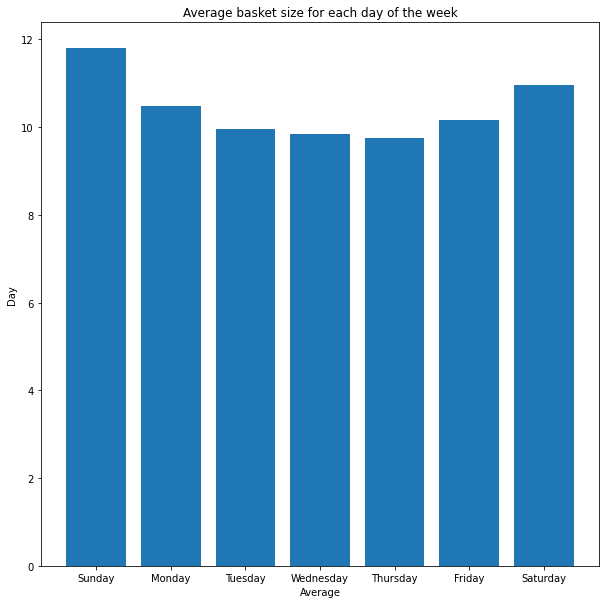

In [14]:
"""
Average basket size for each day of the week
"""
!pip install matplotlib
import matplotlib.pyplot as plt

df = spark.sql("""select order_id, count(product_id ) as totorders from order_prod group by order_id""");
df.createOrReplaceTempView("df")
df2 = spark.sql("""select orders.order_dow, avg(totorders) from df, orders where orders.order_id = df.order_id  group by order_dow order by order_dow""")
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df2 = df2.select("avg(totorders)").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(10,10))
plt.ylabel("Day")
plt.xlabel("Average")
plt.title("Average basket size for each day of the week")
plt.bar(days,df2)
plt.show()

### 3.2 MBA pour le training set / Run MBA for the training set (15 points)

En utilisant les commandes du ``order_products__train.csv``, créez un bloc de données où chaque ligne contient la colonne ``transaction`` avec la liste des produits achetés, de manière similaire à le toy dataset. Ensuite, exécutez l'algorithme MBA pour cet ensemble de transactions.

- Vous devez signaler le temps passé pour effectuer cette tâche.
- La sortie doit contenir le nom des produits.
___
Using the orders from the ``order_products__train.csv``, create a data frame where each row contains the column “transaction” with the list of purchased products, similarly to the toy dataset. In sequence, run the MBA algorithm for this set of transactions. 

- You must report the time spent to perform this task.
- Output must contain the products' name.

In [15]:
%%time
"""
create a query to create and sctruct the transactions
"""
result = spark.sql('SELECT op.order_id as order_id, concat_ws(";", collect_set(p.product_name)) as transaction  '
                   ' FROM order_prod op '
                   ' INNER JOIN products p ON p.product_id = op.product_id '
                   ' GROUP BY op.order_id'
                   ' ORDER BY op.order_id ASC')
result.show(10, truncate=100)

+--------+----------------------------------------------------------------------------------------------------+
|order_id|                                                                                         transaction|
+--------+----------------------------------------------------------------------------------------------------+
|       1|Bag of Organic Bananas;Cucumber Kirby;Lightly Smoked Sardines in Olive Oil;Organic 4% Milk Fat Wh...|
|      36|Cage Free Extra Large Grade AA Eggs;Spring Water;Organic Half & Half;Organic Garnet Sweet Potato ...|
|      38|Bunched Cilantro;Organic Baby Arugula;Organic Hot House Tomato;Fresh Dill;Flat Parsley, Bunch;Gre...|
|      96|Roasted Turkey;Organic Cucumber;Organic Raspberries;Organic Whole Strawberries;Organic Grape Toma...|
|      98|Geranium Liquid Dish Soap;Organic Raspberries;Organic Extra Virgin Oil Olive;100% Organic Unbleac...|
|     112|Umcka Elderberry Intensive Cold + Flu Berry Flavor;Fresh Cauliflower;I Heart Baby Kale;Hickory

In [16]:
## CPU Times : user : 2.32ms, sys: 2.27 ms, total : 4.59
## Wall time : 1.72s

In [17]:
result_rdd = result.rdd # Create data object from SQL query

In [ ]:
%%time
"""
TODO: run the MBA algorithm and show the first 5 association rules
"""
result_rdd = result_rdd.flatMap(map_to_patterns)
result_rdd.map(format_tuples).toDF(['patterns', 'occurrences'])

result_rdd = result_rdd.reduceByKey(reduce_patterns)
result_rdd.map(format_tuples).toDF(['patterns', 'combined_occurrences'])

result_rdd = result_rdd.flatMap(map_to_subpatterns)
result_rdd = result_rdd.map(format_tuples).toDF(['subpatterns', 'rules'])

result_rdd = result_rdd.groupByKey().mapValues(list)
result_rdd.map(format_tuples).toDF(['subpatterns', 'combined_rules'])


result_rdd = result_rdd.flatMap(map_to_assoc_rules)
result_rdd.map(format_tuples).toDF(['patterns', 'association_rules']).show(5,truncate=False)

In [ ]:
# CPU times: user 84ms, sys: 96.9ms, total : 181ms
# Wall time: 18min 49s

## 4. MBA pour le dataset complet / MBA for the full dataset (20 points)

Comme vous l'avez probablement remarqué, même pour un ensemble de données moins volumineux (le training dataset ne contient que 131 000 commandes), l'algorithme MBA est coûteux en calcul. Pour cette raison, cette fois, nous allons répéter le processus, mais en utilisant maintenant Google Cloud Platform (GCP) pour créer un grand cluster. Toutes les instructions pour créer un cluster avec spark et comment soumettre un travail seront expliquées dans le laboratoire. Dans tous les cas, vous devez lire les instructions données dans le ``Instruction_GCP.pdf``.

Cette fois, nous travaillerons avec le fichier ``order_products__prior.csv``, qui contient plus de 3M commandes.

**PRODUCTION ATTENDUE**

Après avoir exécuté le MBA pour la plus grande collection de commandes, sélectionnez au hasard UN produit acheté dans ``order_products__prior`` et affichez les règles d'association (nom du produit et valeur d'association) de ce produit, c'est-à-dire lorsque le produit est seul dans le panier. La sortie doit être formatée dans un tableau, où chaque ligne contenant les informations d'un produit associé. 

- Affichez l'ID et le nom du produit sélectionné au hasard.
- Signaler le temps d'exécution.

**Remarque importante : joignez des captures d'écran de votre sortie et de votre configuration de cluster.** 
___
As you probably noticed, even for a not so large data set (the training file has only 131K orders), the MBA algorithm is computationally expensive. For that reason, this time, we will repeat the process, but now using the Google Cloud Platform (GCP) to create a large computer cluster. All the instructions for creating a computing cluster with spark and how to submit a job will be explained in both sessions of the laboratory. In any case, you should read the instructions given in the ``Instruction_GCP.pdf``.

This time, we will work with the ``order_products__prior.csv`` file, which contains more than 3M orders.

**EXPECTED OUTPUT**

After you ran the MBA for the larger collection of orders, randomly select ONE product purchased in ``order_products__prior`` and print the association rules (product name and association value) of this product, i.e., when the product is alone in the basket. The output should be formatted in a table, where each row containing the information of one associated product.

- Print both ID and Name of the random selected product.
- Report the execution time.

**Important note: Attach screenshots from your output and configuration of your cluster.** 

In [ ]:
%%time
"""
TODO: create a query to create and sctruct the transactions from the order_products__prior.csv file
"""
df_order_prior = spark.read.csv('instacart/order_products__prior.csv', header=True, sep=',', inferSchema=True)
df_order_prior.createOrReplaceTempView("df_order_prior") # create table

full_mba = spark.sql('SELECT op.order_id as order_id, concat_ws(";", collect_set(p.product_name)) as transaction  '
                   ' FROM df_order_prior op '
                   ' INNER JOIN products p ON p.product_id = op.product_id '
                   ' GROUP BY op.order_id'
                   ' ORDER BY op.order_id ASC')

full_mba.show()

In [ ]:
# CPU times: user 108 ms, sys: 8.29 ms, total: 116 ms
# Wall time: 14.9 s

# For the screenshots and for the outputs, see attachments in Moodle

In [ ]:
%%time
"""
TODO: run the MBA algorithm and print the requested output
"""


full_mba = full_mba.flatMap(map_to_patterns)
full_mba.map(format_tuples).toDF(['patterns', 'occurrences'])

full_mba = full_mba.reduceByKey(reduce_patterns)
full_mba.map(format_tuples).toDF(['patterns', 'combined_occurrences'])

full_mba = full_mba.flatMap(map_to_subpatterns)
full_mba = full_mba.map(format_tuples).toDF(['subpatterns', 'rules'])

full_mba = full_mba.groupByKey().mapValues(list)
full_mba.map(format_tuples).toDF(['subpatterns', 'combined_rules'])


full_mba = full_mba.flatMap(map_to_assoc_rules)
full_mba.map(format_tuples).toDF(['patterns', 'association_rules']).show(5,truncate=False)



# Note: For the screenshots and outputs, see the attachments in Moodle